# PS 4 - Automatic Differentiation and Neural Networks
## Question 2: Neural Network Architecture Search

**Your Name:** [Sara Honarvar]

**People I discussed this question with:** [None]

# Load the Data

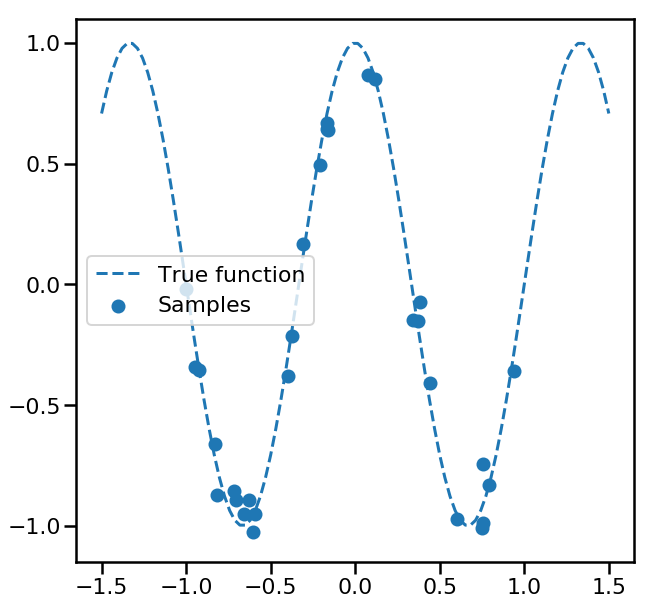

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
np.random.seed(1)

n_samples = 30

# True Function we want to estimate
true_fun = lambda X: np.cos(1.5 * np.pi * X)

# Noisy Samples from the true function
X = np.sort(2*np.random.rand(n_samples)-1)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(10,10))
# Plot the true function:
X_plot = np.linspace(-1.5, 1.5, 100)
plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
# Plot the data samples
plt.scatter(X,y, label="Samples")
plt.legend(loc="best")
plt.show()

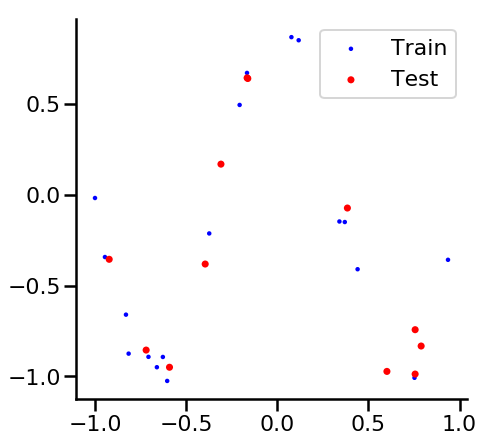

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=0)
plt.figure(figsize=(7,7))
# Plot the data samples
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=50, edgecolors='none')
#plt.plot(X_plot, true_fun(X_plot), 'g--',label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

# PyTorch Neural Network Setup

You can use whatever AD library you want to for this homework, but I will provide starter code along the lines of the in-class notebook, if that is helpful.

In [3]:
# Convert the data into a shape and data-type that PyTorch likes
X_train = X_train.reshape(-1,1).astype(np.float32)
y_train = y_train.reshape(-1,1).astype(np.float32)
X_test = X_test.reshape(-1,1).astype(np.float32)
y_test = y_test.reshape(-1,1).astype(np.float32)

In [4]:
import torch
import torch.nn as nn

In [5]:
input_size  = 1
output_size = 1
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [6]:
# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(X_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [20/500], Loss: 0.3725
Epoch [40/500], Loss: 0.3669
Epoch [60/500], Loss: 0.3665
Epoch [80/500], Loss: 0.3665
Epoch [100/500], Loss: 0.3665
Epoch [120/500], Loss: 0.3665
Epoch [140/500], Loss: 0.3665
Epoch [160/500], Loss: 0.3665
Epoch [180/500], Loss: 0.3665
Epoch [200/500], Loss: 0.3665
Epoch [220/500], Loss: 0.3665
Epoch [240/500], Loss: 0.3665
Epoch [260/500], Loss: 0.3665
Epoch [280/500], Loss: 0.3665
Epoch [300/500], Loss: 0.3665
Epoch [320/500], Loss: 0.3665
Epoch [340/500], Loss: 0.3665
Epoch [360/500], Loss: 0.3665
Epoch [380/500], Loss: 0.3665
Epoch [400/500], Loss: 0.3665
Epoch [420/500], Loss: 0.3665
Epoch [440/500], Loss: 0.3665
Epoch [460/500], Loss: 0.3665
Epoch [480/500], Loss: 0.3665
Epoch [500/500], Loss: 0.3665


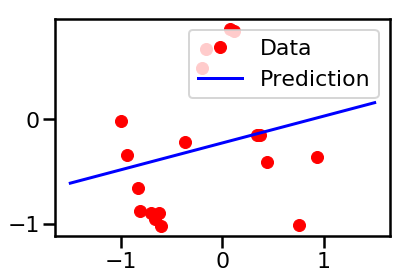

In [7]:
# Plot the graph
plt.plot(X_train, y_train, 'ro', label='Data')
#predicted = model(torch.from_numpy(X_train)).detach().numpy()
#plt.plot(X_train, predicted, 'b+',label='Predictions')
predicted = model(torch.from_numpy(X_plot.reshape(-1,1).astype(np.float32))).detach().numpy()
plt.plot(X_plot, predicted, 'b', label='Prediction')
plt.legend()
plt.show()

In [8]:
np.shape(X_train)

(18, 1)

## Build the Model

Constructing the neural network model for different #hidden units and #hidden layers with Sigmoid as the activation:

In [9]:
class Net_Sigmoid(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_layer=1):
        super(Net_Sigmoid, self).__init__()  
        ################
        # Your Code Here
        self.hidden_layer = hidden_layer
        if self.hidden_layer ==4:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.sigmoid1=nn.Sigmoid()
            self.fc2 = nn.Linear(hidden_size, hidden_size) 
            self.sigmoid2=nn.Sigmoid()
            self.fc3 = nn.Linear(hidden_size, hidden_size)
            self.sigmoid3=nn.Sigmoid()
            self.fc4 = nn.Linear(hidden_size, hidden_size)
            self.sigmoid4=nn.Sigmoid()
            self.fc5 = nn.Linear(hidden_size, 1)
        elif self.hidden_layer ==3:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.sigmoid1=nn.Sigmoid()
            self.fc2 = nn.Linear(hidden_size, hidden_size) 
            self.sigmoid2=nn.Sigmoid()
            self.fc3 = nn.Linear(hidden_size, hidden_size)
            self.sigmoid3=nn.Sigmoid()
            self.fc4 = nn.Linear(hidden_size, 1)
        elif self.hidden_layer ==2:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.sigmoid1=nn.Sigmoid()
            self.fc2 = nn.Linear(hidden_size, hidden_size) 
            self.sigmoid2=nn.Sigmoid()
            self.fc3 = nn.Linear(hidden_size, 1)
        elif self.hidden_layer ==1:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.sigmoid1=nn.Sigmoid()
            self.fc2 = nn.Linear(hidden_size, 1)
        ################
        
    # Forward pass builds the model prediction from the inputs 
    
    def forward(self, x):                              
        ################
        # Your Code Here
        if self.hidden_layer == 4:
            out = self.fc1(x)
            out = self.sigmoid1(out)
            out = self.fc2(out)
            out = self.sigmoid2(out)
            out = self.fc3(out)
            out = self.sigmoid3(out)
            out = self.fc4(out)
            out = self.sigmoid4(out)
            out = self.fc5(out)
            return out
        elif self.hidden_layer == 3:
            out = self.fc1(x)
            out = self.sigmoid1(out)
            out = self.fc2(out)
            out = self.sigmoid2(out)
            out = self.fc3(out)
            out = self.sigmoid3(out)
            out = self.fc4(out)
            return out
        elif self.hidden_layer == 2:
            out = self.fc1(x)
            out = self.sigmoid1(out)
            out = self.fc2(out)
            out = self.sigmoid2(out)
            out = self.fc3(out)
            return out
        elif self.hidden_layer == 1:
            out = self.fc1(x)
            out = self.sigmoid1(out)
            out = self.fc2(out)
            return out
        ################
#         return out
    
# Build the network -- is it not trained yet
#model = Net(input_size=1, hidden_size=4, hidden_layer = 1, activation = 'Sigmoid')
#model = Net(input_size=1, hidden_size=2)
#model = Net(input_size=1, hidden_size=3)
#model = Net(input_size=1, hidden_size=4)

Constructing Model for different #hidden units and #hidden layers with ReLU as the activation:

In [10]:
class Net_ReLU(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_layer=1):
        super(Net_ReLU, self).__init__()  
        ################
        # Your Code Here
        self.hidden_layer = hidden_layer
        if self.hidden_layer ==4:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.relu1=nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, hidden_size) 
            self.relu2=nn.ReLU()
            self.fc3 = nn.Linear(hidden_size, hidden_size)
            self.relu3=nn.ReLU()
            self.fc4 = nn.Linear(hidden_size, hidden_size)
            self.relu4=nn.ReLU()
            self.fc5 = nn.Linear(hidden_size, 1)
        elif self.hidden_layer ==3:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.relu1=nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, hidden_size) 
            self.relu2=nn.ReLU()
            self.fc3 = nn.Linear(hidden_size, hidden_size)
            self.relu3=nn.ReLU()
            self.fc4 = nn.Linear(hidden_size, 1)
        elif self.hidden_layer ==2:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.relu1=nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, hidden_size) 
            self.relu2=nn.ReLU()
            self.fc3 = nn.Linear(hidden_size, 1)
        elif self.hidden_layer ==1:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.relu1=nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, 1)
        ################
        
    # Forward pass builds the model prediction from the inputs 
    
    def forward(self, x):                              
        ################
        # Your Code Here
        if self.hidden_layer == 4:
            out = self.fc1(x)
            out = self.relu1(out)
            out = self.fc2(out)
            out = self.relu2(out)
            out = self.fc3(out)
            out = self.relu3(out)
            out = self.fc4(out)
            out = self.relu4(out)
            out = self.fc5(out)
            return out
        elif self.hidden_layer == 3:
            out = self.fc1(x)
            out = self.relu1(out)
            out = self.fc2(out)
            out = self.relu2(out)
            out = self.fc3(out)
            out = self.relu3(out)
            out = self.fc4(out)
            return out
        elif self.hidden_layer == 2:
            out = self.fc1(x)
            out = self.relu1(out)
            out = self.fc2(out)
            out = self.relu2(out)
            out = self.fc3(out)
            return out
        elif self.hidden_layer == 1:
            out = self.fc1(x)
            out = self.relu1(out)
            out = self.fc2(out)
            return out
        ################
#         return out
    
# Build the network -- is it not trained yet
#model = Net(input_size=1, hidden_size=4, hidden_layer = 1, activation = 'Sigmoid')
#model = Net(input_size=1, hidden_size=2)
#model = Net(input_size=1, hidden_size=3)
#model = Net(input_size=1, hidden_size=4)

Constructing Model for different #hidden units and #hidden layers with ELU as the activation:

In [11]:
class Net_ELU(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_layer=1):
        super(Net_ELU, self).__init__()  
        ################
        # Your Code Here
        self.hidden_layer = hidden_layer
        if self.hidden_layer ==4:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.elu1=nn.ELU()
            self.fc2 = nn.Linear(hidden_size, hidden_size) 
            self.elu2=nn.ELU()
            self.fc3 = nn.Linear(hidden_size, hidden_size)
            self.elu3=nn.ELU()
            self.fc4 = nn.Linear(hidden_size, hidden_size)
            self.elu4=nn.ELU()
            self.fc5 = nn.Linear(hidden_size, 1)
        elif self.hidden_layer ==3:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.elu1=nn.ELU()
            self.fc2 = nn.Linear(hidden_size, hidden_size) 
            self.elu2=nn.ELU()
            self.fc3 = nn.Linear(hidden_size, hidden_size)
            self.elu3=nn.ELU()
            self.fc4 = nn.Linear(hidden_size, 1)
        elif self.hidden_layer ==2:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.elu1=nn.ELU()
            self.fc2 = nn.Linear(hidden_size, hidden_size) 
            self.elu2=nn.ELU()
            self.fc3 = nn.Linear(hidden_size, 1)
        elif self.hidden_layer ==1:
            self.fc1 = nn.Linear(input_size, hidden_size) #fully connected node 
            self.elu1=nn.ELU()
            self.fc2 = nn.Linear(hidden_size, 1)
        ################
        
    # Forward pass builds the model prediction from the inputs 
    
    def forward(self, x):                              
        ################
        # Your Code Here
        if self.hidden_layer == 4:
            out = self.fc1(x)
            out = self.elu1(out)
            out = self.fc2(out)
            out = self.elu2(out)
            out = self.fc3(out)
            out = self.elu3(out)
            out = self.fc4(out)
            out = self.elu4(out)
            out = self.fc5(out)
            return out
        elif self.hidden_layer == 3:
            out = self.fc1(x)
            out = self.elu1(out)
            out = self.fc2(out)
            out = self.elu2(out)
            out = self.fc3(out)
            out = self.elu3(out)
            out = self.fc4(out)
            return out
        elif self.hidden_layer == 2:
            out = self.fc1(x)
            out = self.elu1(out)
            out = self.fc2(out)
            out = self.elu2(out)
            out = self.fc3(out)
            return out
        elif self.hidden_layer == 1:
            out = self.fc1(x)
            out = self.elu1(out)
            out = self.fc2(out)
            return out
        ################
#         return out
    
# Build the network -- is it not trained yet
#model = Net(input_size=1, hidden_size=4, hidden_layer = 1, activation = 'Sigmoid')
#model = Net(input_size=1, hidden_size=2)
#model = Net(input_size=1, hidden_size=3)
#model = Net(input_size=1, hidden_size=4)

In [12]:
#example
model = Net_ELU(input_size=1, hidden_size=5, hidden_layer = 2)
model

Net_ELU(
  (fc1): Linear(in_features=1, out_features=5, bias=True)
  (elu1): ELU(alpha=1.0)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (elu2): ELU(alpha=1.0)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)

## Train the Model

Below demonstrates how we did it in class for a single run and a single train/test split. You will have to do this for additional runs/splits as described in the assignment prompt. Feel free to modify the below to get you started.

In [13]:
# What Loss function should we use? MSE!
criterion = nn.MSELoss()

# What Optimization procedure should we use?
## Feel free to change the below
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0)
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

inputs_test = torch.from_numpy(X_test)
targets_test = torch.from_numpy(y_test)

# For 10K Epochs
num_epochs = 10000


Training the model and creating 1D plots for different activations, #hidden units, and #hidden layers

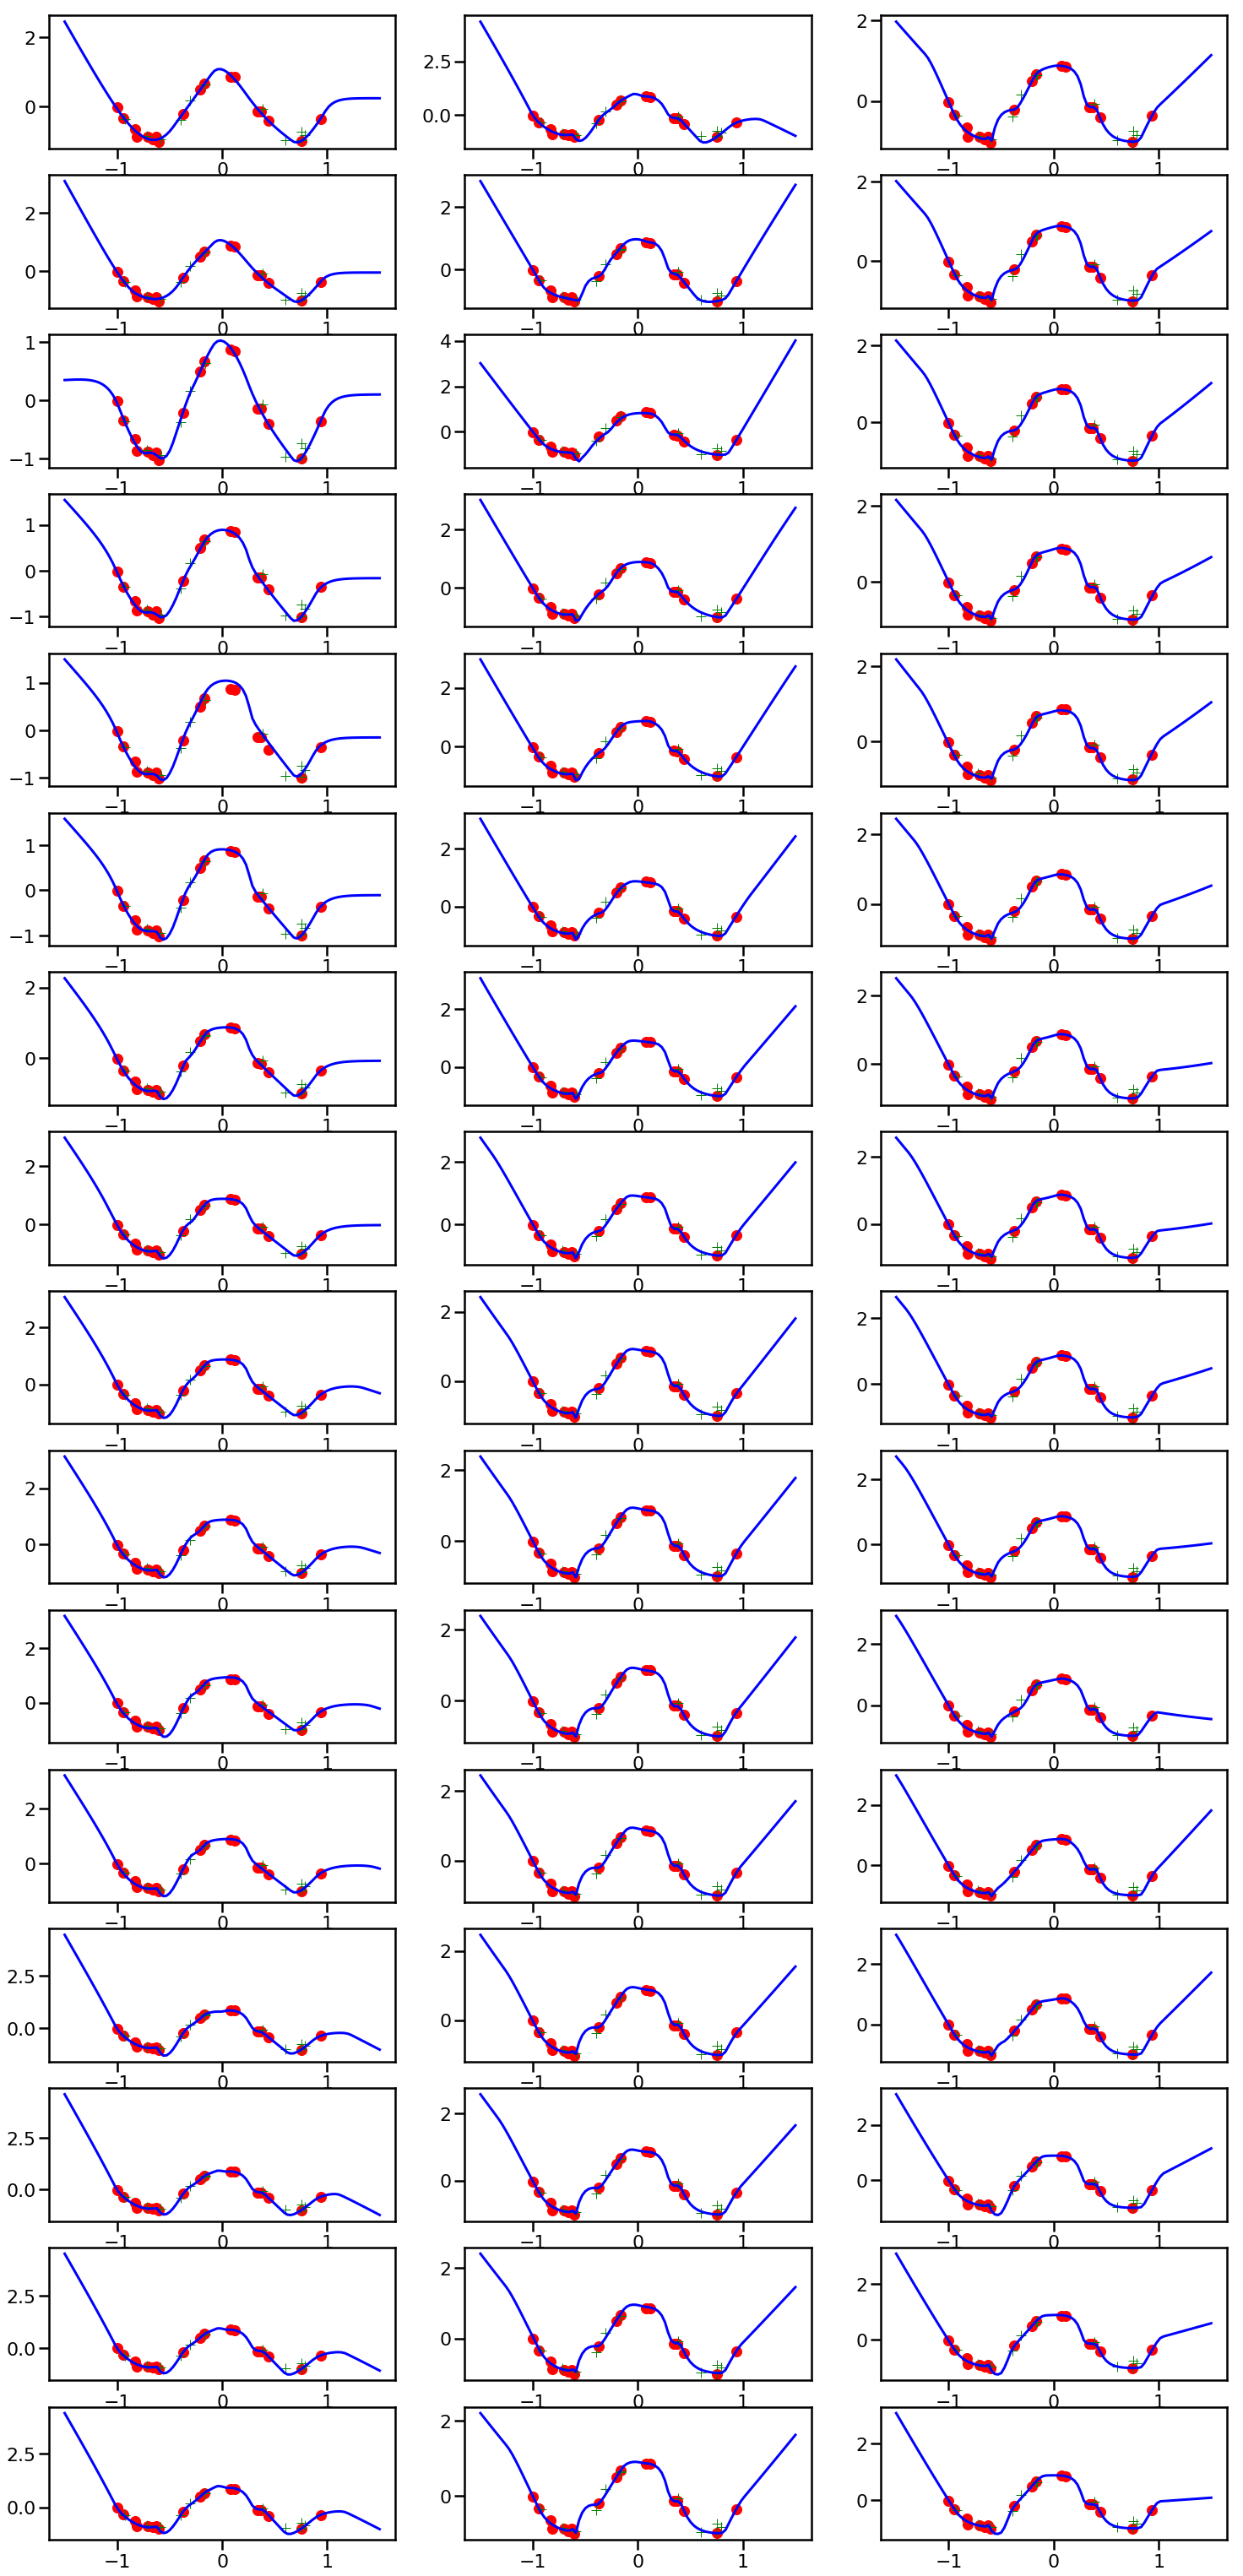

In [14]:
activation = ['Sigmoid','ReLU','ELU']
#activation = ['Sigmoid']
hidden_layer = [1,2,3,4]
hidden_size = [2,3,4,5] #hidden nodes per layer 
fig, axes = plt.subplots(16,3,figsize=(25,55))
col = -1
MSE_train, MSE_test = np.zeros((16,3)), np.zeros((16,3))
for act in activation:
    col = col+1
    row = 0
    for hl in hidden_layer:
        for hs in hidden_size:
            if activation =='Sigmoid':
                model = Net_Sigmoid(input_size=1, hidden_size=hs, hidden_layer = hl)
            elif activation =='ReLU':
                model = Net_ReLU(input_size=1, hidden_size=hs, hidden_layer = hl)
            elif activation =='ELU':
                model = Net_ELU(input_size=1, hidden_size=hs, hidden_layer = hl)

            criterion = nn.MSELoss()

            # What Optimization procedure should we use?
            learning_rate = 0.05
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0)
            for epoch in range(num_epochs):

                ## Do Forward pass
                # Make predictions
                outputs = model(inputs)
                # Compute the loss function
                loss = criterion(outputs, targets)
                ## Update the model
                # Reset the optimizer gradients
                optimizer.zero_grad()
                # Compute the gradient of the loss function
                loss.backward()
                # Do an optimization step
                optimizer.step()
            ## Your Plotting code here.
            MSE_train[row,col] = loss.item()
            y_hat = model(inputs_test)
            MSE_test[row,col] = criterion(y_hat, targets_test).item()
            predicted = model(torch.from_numpy(X_train)).detach().numpy()
            axes[row,col].plot(X_train, y_train, 'ro', label='training')
            axes[row,col].plot(X_test, y_test, 'g+', label='testing')

            #plt.plot(X_train, predicted, 'b+', label='Predictions')

            predicted = model(torch.from_numpy(X_plot.reshape(-1,1).astype(np.float32))).detach().numpy()
            axes[row,col].plot(X_plot, predicted, 'b', label='Prediction')
            #axes[row,col].title()
            row = row+1
            #print(row)
#Discrption of graph and subplots
#First col = Sigmoid
#second col = ReLU
#third col= ELU
#row 1,2,3,4 = #Layers:1, # HiddenUnits:2,3,4,5, respectively
#row 5,6,7,8 = #Layers:2, # HiddenUnits:2,3,4,5, respectively
#row 9,10,11,12 = #Layers:3, # HiddenUnits:2,3,4,5, respectively
#row 13,14,15,16 = #Layers:4, # HiddenUnits:2,3,4,5, respectively
#blue line shows prediction
#red dots show training data
#green marks show testing data


Drawing 2D contour plot- one run 

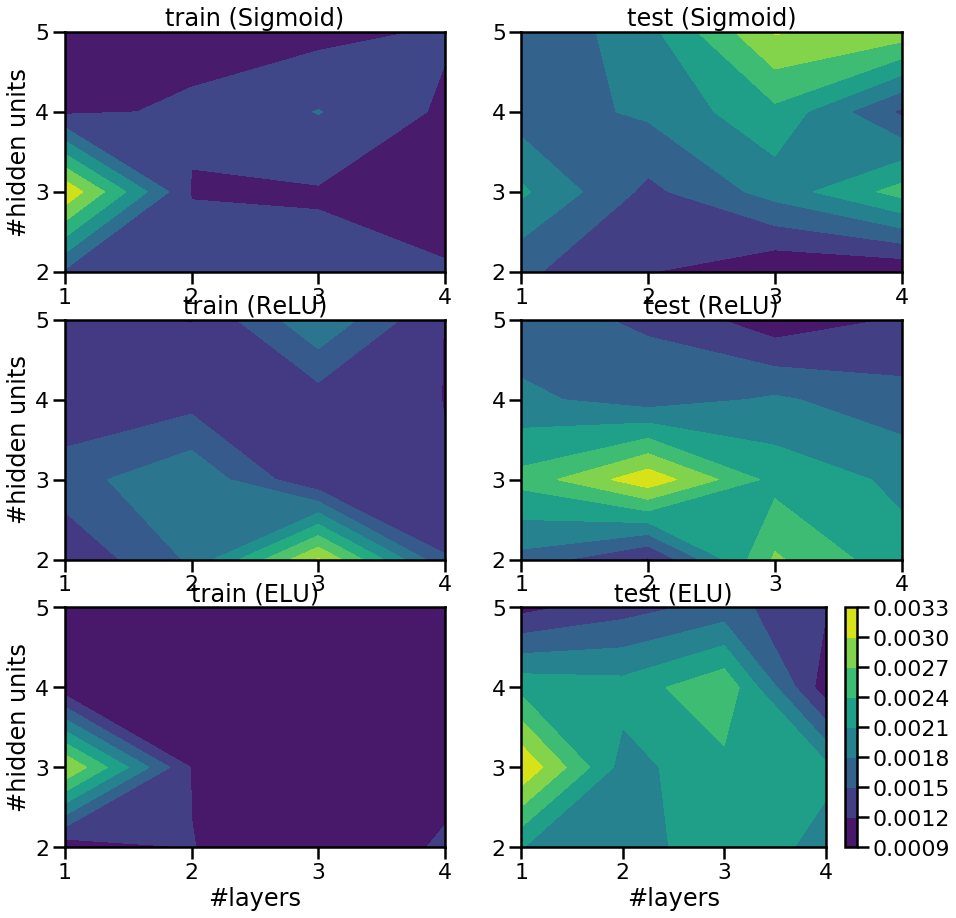

In [41]:
X = np.linspace(1,4,4)
Y = np.linspace(2,5,4)
fig , axes = plt.subplots(3,2,figsize=(15,15))
for i in range(3):
    Z_test = np.reshape(MSE_test[:,i],(4,4))
    Z_train = np.reshape(MSE_train[:,i],(4,4))
    a = axes[i,0].contourf(X, Y, Z_train)
    axes[i,1].contourf(X, Y, Z_test)
    axes[i,0].set_ylabel('#hidden units')

axes[0,0].set_title('train (Sigmoid)')
axes[1,0].set_title('train (ReLU)')
axes[2,0].set_title('train (ELU)')
axes[0,1].set_title('test (Sigmoid)')
axes[1,1].set_title('test (ReLU)')
axes[2,1].set_title('test (ELU)')
axes[2,0].set_xlabel('#layers')
axes[2,1].set_xlabel('#layers')
fig.colorbar(a)

Restarting the network and running it for 10times to find averaged MSE train and test for each activation, #layers and #hidden units

In [16]:
# What Loss function should we use? MSE!
criterion = nn.MSELoss()

# What Optimization procedure should we use?
## Feel free to change the below
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0)
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

inputs_test = torch.from_numpy(X_test)
targets_test = torch.from_numpy(y_test)

# For 10K Epochs
num_epochs = 100

In [17]:
activation = ['Sigmoid','ReLU','ELU']
#activation = ['Sigmoid']
hidden_layer = [1,2,3,4]
hidden_size = [2,3,4,5] #hidden nodes per layer 
col = -1
MSE_train_ave, MSE_test_ave = np.zeros((16,3)), np.zeros((16,3))
a_train,a_test = np.zeros((10,1)),np.zeros((10,1))
for act in activation:
    col = col+1
    row = 0
    for hl in hidden_layer:
        for hs in hidden_size:
            if activation =='Sigmoid':
                model = Net_Sigmoid(input_size=1, hidden_size=hs, hidden_layer = hl)
            elif activation =='ReLU':
                model = Net_ReLU(input_size=1, hidden_size=hs, hidden_layer = hl)
            elif activation =='ELU':
                model = Net_ELU(input_size=1, hidden_size=hs, hidden_layer = hl)

            criterion = nn.MSELoss()

            # What Optimization procedure should we use?
            learning_rate = 0.05
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0)
            for i in range(10):
                for epoch in range(num_epochs):

                    ## Do Forward pass
                    # Make predictions
                    outputs = model(inputs)
                    # Compute the loss function
                    loss = criterion(outputs, targets)
                    ## Update the model
                    # Reset the optimizer gradients
                    optimizer.zero_grad()
                    # Compute the gradient of the loss function
                    loss.backward()
                    # Do an optimization step
                    optimizer.step()
                a_train[i] = loss.item()
                y_hat = model(inputs_test)
                a_test[i] = criterion(y_hat, targets_test).item()
               
            MSE_train_ave[row,col] = np.average(a_train)
            MSE_test_ave[row,col]  = np.average(a_test)            
            row = row+1
            

In [18]:
MSE_test

array([[0.01211231, 0.01598655, 0.01521971],
       [0.01143467, 0.01326744, 0.01456177],
       [0.01085715, 0.02122041, 0.01596748],
       [0.01087822, 0.01847857, 0.01485902],
       [0.01331085, 0.02000123, 0.0183231 ],
       [0.0118414 , 0.02352958, 0.01488371],
       [0.01283869, 0.01895482, 0.01576189],
       [0.01403529, 0.01769277, 0.01543962],
       [0.01227782, 0.01687969, 0.01574794],
       [0.01270929, 0.01571546, 0.01552135],
       [0.01365148, 0.01673468, 0.01663855],
       [0.01188044, 0.0155466 , 0.01233306],
       [0.01201432, 0.01547824, 0.01254418],
       [0.01300677, 0.01480665, 0.01325963],
       [0.01504654, 0.01252483, 0.01390359],
       [0.01475987, 0.01364507, 0.01286316]])

Creating contour 2D plot for the averaged Test and Train MSE for each activation and different number of hidden layers and hidden units

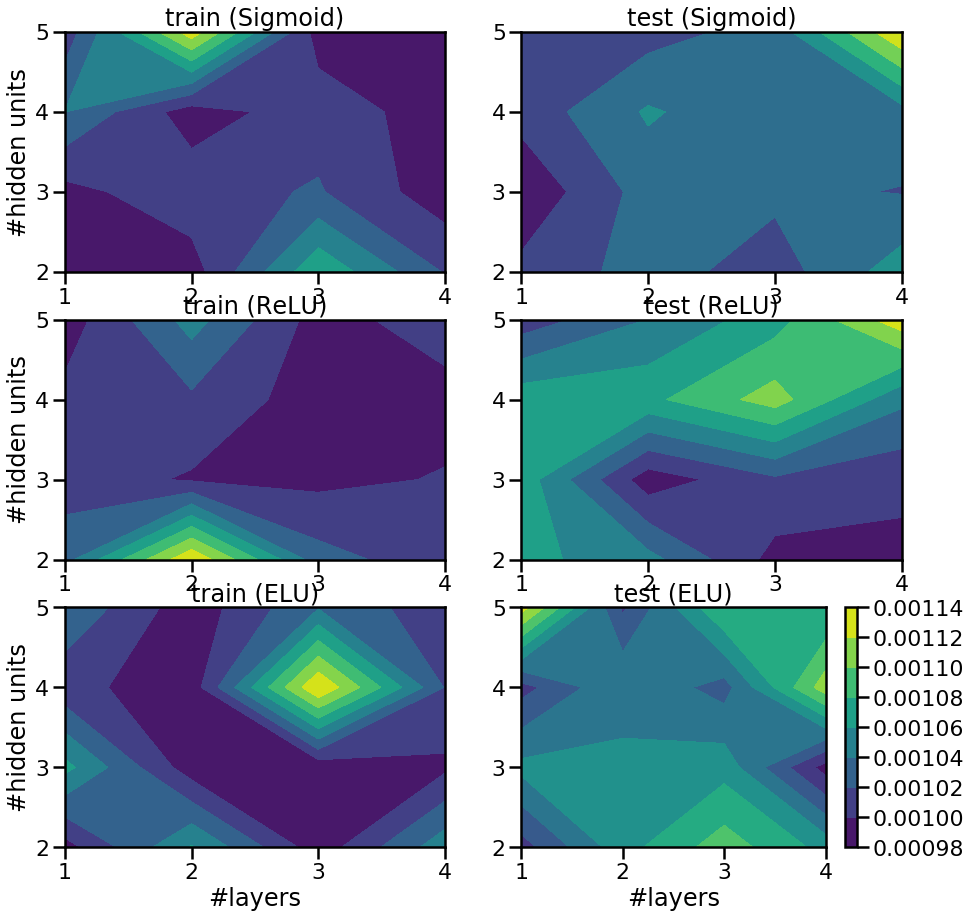

In [37]:
X = np.linspace(1,4,4)
Y = np.linspace(2,5,4)
fig , axes = plt.subplots(3,2,figsize=(15,15))
for i in range(3):
    Z_test = np.reshape(MSE_test_ave[:,i],(4,4))
    Z_train = np.reshape(MSE_train_ave[:,i],(4,4))
    a = axes[i,0].contourf(X, Y, Z_train)
    axes[i,1].contourf(X, Y, Z_test)
    axes[i,0].set_ylabel('#hidden units')

axes[0,0].set_title('train (Sigmoid)')
axes[1,0].set_title('train (ReLU)')
axes[2,0].set_title('train (ELU)')
axes[0,1].set_title('test (Sigmoid)')
axes[1,1].set_title('test (ReLU)')
axes[2,1].set_title('test (ELU)')
axes[2,0].set_xlabel('#layers')
axes[2,1].set_xlabel('#layers')
fig.colorbar(a)

## Plot the Results

Provide Plots for:

* One or more 1-D Plots for each activation function showing the general 1-D behavior. You can pick whatever run or selection of hyper-parameter settings you wish for each of the activation to demonstrate the behavior.
* A 2D countor plot of # Layers and # hidden units with the countour values being the MSE values. Produce one contour plot of Test MSE and one Train MSE for each of the activation types.

In [20]:
## Your Plotting code here.
#All the plots can be found in the above cells. There is a title
#for each cell to explain what is happening in each cell
#the first part was drawn above in the training model cell.
#2D cantour plot was also plotted in the above for one run. 
#Also I drew 2D contour plot # Layers and # hidden units
#with the countour values being the averaged MSE values.




# Interpret the Results

Answer the questions below based on your above plots

**Question**: From the plots you made in step 2, do you see any differences in the general behavior of the activations? That is, on average, how does the use of sigmoid vs relu vs elu activations make the learned function behave differently? Particularly, look at what happens when you "extend" the function beyond the training data (e.g., x > 1 or <-1)

**Student Response:** [In general, sigmoid seems to produce more smooth prediction. However, extending the function beyond the training data shows that ReLu performs better and is better able to predict the trend in the true function even with few #layers and #hidden layers (e.g even with 2 layers and 3 hidden units it can predict the trend well and beyond these number of layers and nodes the predicted function seem not be changing that much). The trend beyond training data for example larger than 1 can also be reproduced with ELU with some combination of layers and hidden units. But sigmoid seem not to be able to produce trend after 1. It become low or flat.]

**Question**: What effect does increasing the # of layers and # of hidden units have on the Test MSE score? Is a deeper network always better? Is a wider network always better? Is a shallow network better? 

**Student Response:** [
As shown in the contour plots, it seems that increasing # of layers and #hidden units not necessarily improve the test MSE. For example with sigmoid even with few #of layers and #hidden units the test MSE is very low. But with deeper network, the error is larger for high number of units. So, Increasing the layers and units increase the computational cost and longer converge time which is not favorable. ]

**Question**: For each of the activations (Sigmoid, Relu, Elu), which set of hyper-parameters (the # of layers, and # hidden units) appears to provide the best Test MSE?

**Student Response:** [For Sigmoid, with 1 layer and 2 units as well as 2 layers and 2 units, the test MSE is very low.
For ReLU, 2 layers and 3 units produce the least test_MSE althouth 1 layer with 4 and 5 and units also produce very low MSE. 
FOR ELU, 2 layers and 5 units produce the best results.
You can see the output of the next cell.]





In [40]:
MSE_test_ave

array([[0.0129809 , 0.01382885, 0.01311021],
       [0.01332717, 0.01358747, 0.01372127],
       [0.01305511, 0.01291349, 0.01410625],
       [0.01365793, 0.01293654, 0.01372982],
       [0.01265937, 0.01389566, 0.01365855],
       [0.01333053, 0.0128546 , 0.01360876],
       [0.01326595, 0.01320429, 0.01372088],
       [0.01318484, 0.01305699, 0.01291635],
       [0.01300934, 0.01391159, 0.01312184],
       [0.01353632, 0.01393741, 0.01358471],
       [0.01326975, 0.01436512, 0.01331672],
       [0.01338118, 0.01355564, 0.01431399],
       [0.01314246, 0.01309671, 0.01450214],
       [0.01307709, 0.01350451, 0.01316703],
       [0.01332247, 0.01389353, 0.01400014],
       [0.01468582, 0.01465212, 0.0137859 ]])